In [220]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [221]:
n, k = 10, 2


weight = [[0 for i in range(n)] for j in range(n)]
for i in range(0, n):
    for j in range(i + 1, n):
        weight[i][j] = np.random.randint(1, 100)
        weight[j][i] = weight[i][j]

tree = [[0 for i in range(n)] for j in range(n)]

print(weight)

[[0, 90, 83, 54, 81, 81, 61, 70, 80, 21], [90, 0, 92, 38, 75, 86, 88, 53, 57, 14], [83, 92, 0, 65, 30, 74, 55, 52, 71, 52], [54, 38, 65, 0, 8, 52, 63, 92, 70, 54], [81, 75, 30, 8, 0, 96, 46, 34, 46, 99], [81, 86, 74, 52, 96, 0, 33, 99, 97, 42], [61, 88, 55, 63, 46, 33, 0, 6, 34, 45], [70, 53, 52, 92, 34, 99, 6, 0, 48, 52], [80, 57, 71, 70, 46, 97, 34, 48, 0, 83], [21, 14, 52, 54, 99, 42, 45, 52, 83, 0]]


In [222]:
def first_connection(weight,tree):
    connect_pnt = [0 for i in range(n)]
    minim = sys.maxsize
    i_min, j_min = 0, 1
    for i in range(n):
        for j in range(i + 1, n):
            if minim > weight[i][j]:
                minim = weight[i][j]
                i_min, j_min = i, j
    tree[i_min][j_min] = minim
    tree[j_min][i_min] = minim
    weight[i_min][j_min] = weight[j_min][i_min] = sys.maxsize
    connect_pnt[i_min] = connect_pnt[j_min] = 1
    return connect_pnt

In [223]:
def lync_all(weight,tree,connect_pnt):
    minim = sys.maxsize
    i_min, j_min = None, None
    for i in range(n):
        if connect_pnt[i] == 1:
            for j in range(n):
                if connect_pnt[j] == 0:
                    if (minim > weight[i][j]):
                        minim = weight[i][j]
                        i_min, j_min = i, j
    tree[i_min][j_min] = minim
    tree[j_min][i_min] = minim
    weight[i_min][j_min] = weight[j_min][i_min] = sys.maxsize
    connect_pnt[i_min] = connect_pnt[j_min] = 1

In [224]:
def delete_connection(tree):
    maxim = 0
    i_max = j_max = 0
    for i in range(n):
        for j in range(i + 1, n):
            if tree[i][j] > maxim:
                maxim = tree[i][j]
                i_max, j_max = i, j
    tree[i_max][j_max] = tree[j_max][i_max] = 0

In [225]:
def cluster(cl,tree,clust_pnt):
    clust = []
    for i in range(n): 
        for j in range(n): 
            if tree[i][j] == 0: 
                continue
            if len(clust) == 0:
                clust.append(i)
                clust.append(j)
                tree[i][j] = tree[j][i] = 0 
    
    for i in range(2):
        m = clust[i]
        old_m = -1
        while old_m != m:
            old_m = m
            for j in range(n):
                if tree[m][j] == 0: 
                    continue
                else:
                    clust.append(j)
                    tree[m][j] = tree[j][m] = 0
                    m = j
                    
    for i in clust:
        clust_pnt[i] = cl

In [226]:
connect_pnt = first_connection(weight,tree)
while 0 in connect_pnt:
    lync_all(weight,tree,connect_pnt)
for i in range(k - 1):
    delete_connection(tree)
clust_pnt = [0 for i in range(n)]
clust_old = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        clust_old[i][j] = tree[i][j]
for i in range(1, k):
    cluster(i, tree,clust_pnt)

{(0, 9): Text(0.9045084723427135, -0.2938926225450651, '21.0'),
 (1, 9): Text(0.8090169744877491, -3.178651286628309e-09, '14.0'),
 (2, 4): Text(-0.2500000335276124, 0.7694208819423884, '30.0'),
 (3, 4): Text(-0.5590170333473352, 0.7694208521400663, '8.0'),
 (4, 7): Text(-0.5590170631496574, -0.18163561976454123, '34.0'),
 (5, 6): Text(-0.9045084544613202, -0.29389269605877516, '33.0'),
 (6, 7): Text(-0.559017003545013, -0.769420888299691, '6.0'),
 (6, 8): Text(-0.24999989941716289, -0.769420888299691, '34.0')}

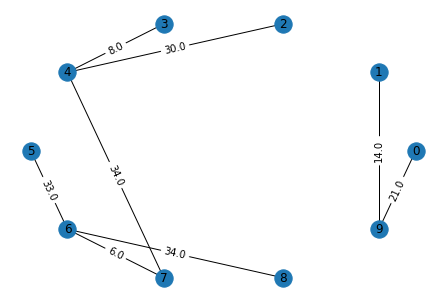

In [227]:
G = nx.Graph(strict=False)
tree = clust_old
for i in range(n):
    G.add_node(i)
for i in range(n):
    for j in range(n):
        if tree[i][j] != 0:
            G.add_edge(i,j, weight=tree[i][j])
            G.add_edges_from([(i, j, {'weight': tree[i][j]})])
            tree[i][j] = tree[j][i] = 0 
nx.draw_circular(G, with_labels=True)
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels)